# Classification model to Predict Subscription

In this notebook, we will use user data from a magazine company to identify what feature are important to decide whether user will subscribe for the magazine or not. We will built a classification model to predict the subcription of user using selected feature variable.

## 1. Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as DT
from datetime import datetime
from datetime import date

from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 


In [2]:
data = pd.read_csv('marketing_campaign.csv', sep=";")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. EDA and Data cleaning

### Null value
We will check for null value **and fill the missing value with the average of subcategory.**

In [3]:
#checking for null values in dataset
data.isnull().values.sum()

24

In [4]:
#identifying null fields
data[data.isnull().any(axis=1)] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [5]:
#replacing replacing null feild in Income column by average of respective Marital_status
data['Income'] = data['Income'].fillna(data.groupby('Marital_Status')['Income'].transform('mean'))

### Reviewing Data types 
We will check the data types of feature variable and transform to usable form

In [6]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
#droping ID column which is not relvent in model
data.drop('ID', axis=1, inplace=True) 

In [8]:
#Discriptive statistics of numerical variable
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52245.599240,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25038.162079,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51445.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
#Z_CostContact and Z_Revenue is constant, hence no value-aid in model
#droping constants

data.drop({'Z_CostContact','Z_Revenue'}, axis=1, inplace=True) 

### Transforming Categorical variables

In [10]:
#reviewing Categorical variable
data.describe(include=[object])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


We have three categorical variables, 'Education' with 5 levels of education, 'Marital_Status' with 8 categorical levels of customer’s marital status and 'Dt_Customer' which is customer registration date.

Customer registration date is not formatted as date; hence we will start with formatting as date and transforming to Number of days since customer’ registration with the company, which as number, can be use in model as feature.

In [11]:
#changing customer registration date to days from registration 
currentdate = np.datetime64('today')
data['Dt_Customer'] = data['Dt_Customer'].apply(lambda x: DT.datetime.strptime(x, "%Y-%m-%d"))
day_diff = (currentdate - data['Dt_Customer'])
customer_since = day_diff.astype('timedelta64[D]')
data = data.drop(['Dt_Customer'], axis = 1)

In [12]:
data = pd.concat([data, customer_since], axis=1)

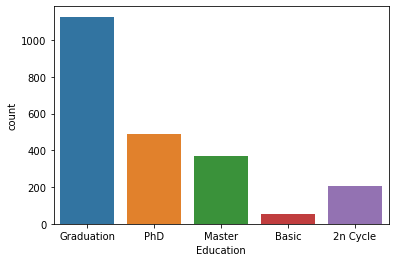

In [13]:
#now we will visualize the frequency distribution of Equcation categories
sns.countplot(data = data, x= 'Education')

We will standardizing education level to 4 relevant category

In [14]:
data['Education'] = data['Education'].replace({'2n Cycle': 'Bachelor', 'Graduation': 'Bachelor'})

Since education level have order, Basic to Phd, we will encode education categorical variable into oridinal variable

In [15]:
#changing categorical variable education to ordinal encoding 
mapper = {'Basic': 0, 'Bachelor':1, 'Master': 2, 'PhD': 3}
data['Education'] = data['Education'].replace(mapper)

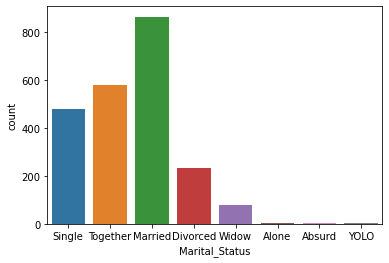

In [16]:
#frequency distribution of "Marital_Status"
sns.countplot(data = data, x= 'Marital_Status')

Standardizing Marital status to 3 category 

In [17]:
data['Marital_Status'] = data['Marital_Status'].replace({'Alone': 'Single', 'Absurd':'Single', 'YOLO':'Single'})
data['Marital_Status'] = data['Marital_Status'].replace({'Together': 'Married'})
data['Marital_Status'] = data['Marital_Status'].replace({'Widow': 'Divorced'})

Since, Marital Status has three levels, using one hot encoding technique to transform in numerical variable. 
Also, to avoid multicolinearity, we will remove one of the binary numerical variable.

In [18]:
data = pd.get_dummies(data, prefix= ['Marital_status'], columns = ['Marital_Status'])
data = data.drop(['Marital_status_Divorced'], axis = 1)

Now we recheck to conform if all the variable are converted to usable data type.

In [19]:
data.dtypes

Year_Birth                  int64
Education                   int64
Income                    float64
Kidhome                     int64
Teenhome                    int64
Recency                     int64
MntWines                    int64
MntFruits                   int64
MntMeatProducts             int64
MntFishProducts             int64
MntSweetProducts            int64
MntGoldProds                int64
NumDealsPurchases           int64
NumWebPurchases             int64
NumCatalogPurchases         int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
AcceptedCmp3                int64
AcceptedCmp4                int64
AcceptedCmp5                int64
AcceptedCmp1                int64
AcceptedCmp2                int64
Complain                    int64
Response                    int64
Dt_Customer               float64
Marital_status_Married      uint8
Marital_status_Single       uint8
dtype: object

### Feature importance 
We will evaluate Pearson correlation coefficient between feature variable and target variable

In [20]:
#corelation evaluation for feature importance
data.corr()["Response"]  

Year_Birth                0.021325
Education                 0.095504
Income                    0.132994
Kidhome                  -0.080008
Teenhome                 -0.154446
Recency                  -0.198437
MntWines                  0.247254
MntFruits                 0.125289
MntMeatProducts           0.236335
MntFishProducts           0.111331
MntSweetProducts          0.117372
MntGoldProds              0.139850
NumDealsPurchases         0.002238
NumWebPurchases           0.148730
NumCatalogPurchases       0.220810
NumStorePurchases         0.039363
NumWebVisitsMonth        -0.003987
AcceptedCmp3              0.254258
AcceptedCmp4              0.177019
AcceptedCmp5              0.326634
AcceptedCmp1              0.293982
AcceptedCmp2              0.169293
Complain                 -0.001707
Response                  1.000000
Dt_Customer               0.194481
Marital_status_Married   -0.150075
Marital_status_Single     0.110555
Name: Response, dtype: float64

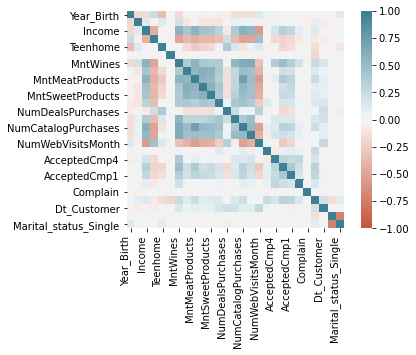

In [21]:
corr=data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [22]:
#filtering out feature with less than 0.05 correlation coefficient  
abs(data.corr()["Response"]) < 0.05

Year_Birth                 True
Education                 False
Income                    False
Kidhome                   False
Teenhome                  False
Recency                   False
MntWines                  False
MntFruits                 False
MntMeatProducts           False
MntFishProducts           False
MntSweetProducts          False
MntGoldProds              False
NumDealsPurchases          True
NumWebPurchases           False
NumCatalogPurchases       False
NumStorePurchases          True
NumWebVisitsMonth          True
AcceptedCmp3              False
AcceptedCmp4              False
AcceptedCmp5              False
AcceptedCmp1              False
AcceptedCmp2              False
Complain                   True
Response                  False
Dt_Customer               False
Marital_status_Married    False
Marital_status_Single     False
Name: Response, dtype: bool

Droping variables which are very weakly correlated with target variable. 

In [23]:
#droping NumDealsPurchases,Year_Birth, NumStorePurchases,NumWebVisitsMonth,Complain             
data.drop({'Year_Birth','NumDealsPurchases','NumStorePurchases','NumWebVisitsMonth','Complain'}, axis=1, inplace=True) 

# 3. Modeling and Testing

In [24]:
#dividing target variable from feature variables
X = data.drop(columns='Response')
y = data.Response

In [25]:
#spliting dataset to testing and trainning set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 21)

Most of the variables in dataset are small range number, but 'Dt_Customer' and 'Income' has wider and different range. If not scaled, one might dominate other features. We will scale the variable to avoid one feature dominance over other. 

In [26]:
#feature scaling as Income and Dt_Customer value lies in different ranges. 
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

### Training Model
Since, the target variable is binary, we will implement a Logistic regression model, predicting whether a user will subscribe  the magazine or not. 

In [27]:
#trainning logistic regression modeling with training set
model1 = LogisticRegression(random_state = 21)
model1.fit(X_train, y_train)

LogisticRegression(random_state=21)

In [28]:
#testing model1 against x_test dataset
y_pred = model1.predict(X_test)
cfm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", cfm)

Confusion Matrix: 
 [[547  16]
 [ 67  42]]


In [29]:
print("The Acuuracy of Logistic Regression model is : ", accuracy_score(y_test, y_pred))

The Acuuracy of Logistic Regression model is :  0.8764880952380952


The above model, when tested with unfamiliar testing set yield  the **Accuracy of 87.64%**

We will model a KNN Regression using same set to compare the accuracy between Logistics Regression and K-nearest neighbhor (KNN) regression. 

Text(0.5, 1.0, 'Change of Accuracy at different K')

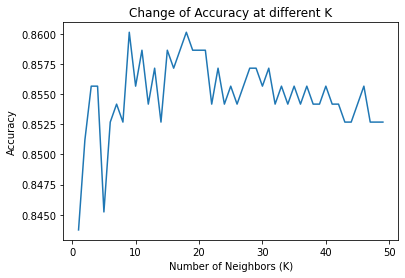

In [30]:
#finding Best value of K for highest accuracy
accu = []
for k in range(1,50):
 model2= KNeighborsClassifier(n_neighbors = k)
 model2.fit(X_train, y_train)
 y_pred2 = model2.predict(X_test)
 accu.append(accuracy_score(y_test, y_pred2))
plt.plot(range(1,50), accu)
plt.xlabel('Number of Neighbors (K)')  
plt.ylabel('Accuracy')  
plt.title("Change of Accuracy at different K") 

In [31]:
#Knn model
model2= KNeighborsClassifier(n_neighbors = 9)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [32]:
cfm2 = confusion_matrix(y_test,y_pred2)
print("Confusion Matrix: \n", cfm2)

Confusion Matrix: 
 [[549  14]
 [ 80  29]]


In [33]:
print("Accuracy of KNN model is : ", accuracy_score(y_test, y_pred2))


Accuracy of KNN model is :  0.8601190476190477


When tested with same testing set, KNN model yield  the **Accuracy of 86.01%**

**Refer Report file for details** 